In [12]:
import pandas as pd

"""获得数据"""
df = pd.read_csv("东方财富网个人股票报告数据.csv")
"""此数据截至到12.1"""
df = df.drop(['stock_report_url', 'stock_report_txt_url', 'id'], axis=1)
df


,stockCode,stockName,title,orgSName,indvInduName,publishDate
0,2946,新乳业,Q3业绩超预期，成本红利+结构提升稳中有进,华西证券,食品饮料,2023-11-02 00:00:00.000
1,651,格力电器,经营保持韧性，业绩表现亮眼,天风证券,家电行业,2023-11-02 00:00:00.000
2,688012,中微公司,公司信息更新报告：2023Q3营收持续高增长，非经损益影响净利润,开源证券,半导体,2023-11-02 00:00:00.000
3,600256,广汇能源,公司三季报点评报告：煤&气价格下跌业绩承压，关注高成长与高股息,开源证券,石油行业,2023-11-02 00:00:00.000
4,34,神州数码,AI与信创双轮驱动，鲲鹏+升腾齐放量,华西证券,计算机设备,2023-11-02 00:00:00.000
...,...,...,...,...,...,...
174730,601398,工商银行,Earnings outlook to mildly improve,农银国际证券,银行,2023-12-01 00:00:00.000
174731,2020,京新药业,失眠新药地达西尼获批上市，引燃国内失眠药物市场,平安证券,化学制药,2023-12-01 00:00:00.000
174732,725,京东方A,跟进OLED市场未来需求，高端手机带动OLED面板量价齐升,华金证券,光学光电子,2023-12-01 00:00:00.000
174733,2979,雷赛智能,无框电机+空心杯新品发布，机器人业务有望贡献新增量,信达证券,专用设备,2023-12-01 00:00:00.000


In [13]:
"""测试数据"""
df['indvInduName'].nunique()
df['publishDate'] = pd.to_datetime(df['publishDate'])
df_2023 = df[df['publishDate'].dt.year == 2023]
df_2023

,stockCode,stockName,title,orgSName,indvInduName,publishDate
0,2946,新乳业,Q3业绩超预期，成本红利+结构提升稳中有进,华西证券,食品饮料,2023-11-02
1,651,格力电器,经营保持韧性，业绩表现亮眼,天风证券,家电行业,2023-11-02
2,688012,中微公司,公司信息更新报告：2023Q3营收持续高增长，非经损益影响净利润,开源证券,半导体,2023-11-02
3,600256,广汇能源,公司三季报点评报告：煤&气价格下跌业绩承压，关注高成长与高股息,开源证券,石油行业,2023-11-02
4,34,神州数码,AI与信创双轮驱动，鲲鹏+升腾齐放量,华西证券,计算机设备,2023-11-02
...,...,...,...,...,...,...
174730,601398,工商银行,Earnings outlook to mildly improve,农银国际证券,银行,2023-12-01
174731,2020,京新药业,失眠新药地达西尼获批上市，引燃国内失眠药物市场,平安证券,化学制药,2023-12-01
174732,725,京东方A,跟进OLED市场未来需求，高端手机带动OLED面板量价齐升,华金证券,光学光电子,2023-12-01
174733,2979,雷赛智能,无框电机+空心杯新品发布，机器人业务有望贡献新增量,信达证券,专用设备,2023-12-01


In [14]:
"""分组数据"""
# value_counts = df['publishDate'].dt.year.value_counts()
# year_list = []
# for index, count in value_counts.items():
#     print(f"{index}: {count}")
#     year_list.append(index)

'分组数据'

In [15]:
"""行业年数据"""
value_counts = df['indvInduName'].value_counts().to_frame()
year_list = [2017, 2018, 2019, 2020, 2021, 2022, 2023]
get_value_counts_by_year = lambda year: df[df['publishDate'].dt.year == year][
    'indvInduName'].value_counts().to_frame().rename(columns={"count": f"{year}"})
for year in year_list:
    value_counts = pd.merge(value_counts, get_value_counts_by_year(year), on='indvInduName')
value_counts.rename(columns={"count": "all"}, inplace=True)
value_counts


,all,2017,2018,2019,2020,2021,2022,2023
indvInduName,,,,,,,,
电子元件,8879,1292,1204,1437,1546,1809,785,806
食品饮料,8069,517,706,856,1069,1191,1694,2036
酿酒行业,5582,355,480,490,634,829,1365,1429
专用设备,5382,382,446,574,723,917,1117,1223
家电行业,4867,469,480,416,483,495,1269,1255
...,...,...,...,...,...,...,...,...
综合行业,464,49,73,67,116,135,19,5
电子化学品,401,2,6,5,2,6,175,205
能源金属,320,3,2,2,4,25,178,106


In [16]:
def figure_by_industry_name(name):
    import matplotlib.pyplot as plt
    import matplotlib
    matplotlib.rc("font", family='YouYuan')
    # 创建一个 matplotlib 图表
    plt.figure()
    # 将 df 的数据添加到图表中
    plt.plot(value_counts.columns[1:], value_counts[f"{name}": f"{name}"].to_numpy().tolist()[0][1:])
    # 设置图表的标题和轴标签
    plt.title(f'{name}股票报告数量近年趋势')
    plt.xlabel('X')
    plt.ylabel('Y')
    # 显示图表
    plt.show()

# figure_by_industry_name("电子元件")

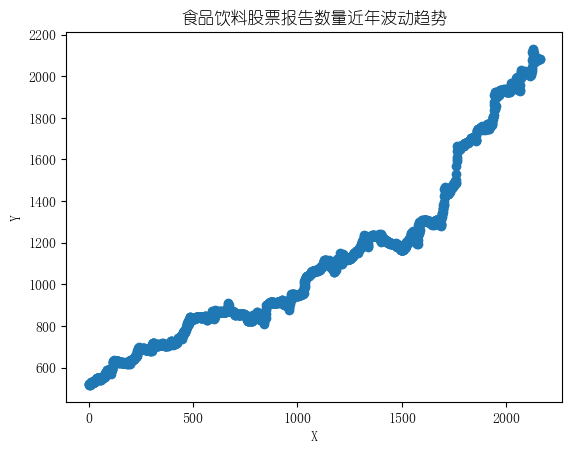

In [17]:
def get_365_date_data(name, show_= True):
    import datetime
    import numpy as np
    begin = datetime.date(2017, 1, 1)
    end = datetime.date(2018, 1, 1)
    data = df.loc[df["indvInduName"] == name, :]
    count = len(data.loc[(data["publishDate"] >= np.datetime64(begin)) & (data["publishDate"] <= np.datetime64(end))])
    res_list = _get_365_date_data(data, begin, end, count)
    if show_:
        figure_by_industry_name_update1(name, res_list)
    return res_list


def _get_365_date_data(data, begin, end, count):
    import numpy as np
    import datetime
    res_list = [count]
    i = 0
    while True:
        count_0 = len(data.loc[(data["publishDate"] == np.datetime64(begin+datetime.timedelta(days=i)))])
        count_1 = len(data.loc[(data["publishDate"] == np.datetime64(end+datetime.timedelta(days=i+1)))])
        count = count - count_0 + count_1
        res_list.append(count)
        i += 1
        if end+datetime.timedelta(days=i+1) == datetime.date(2023, 12, 1):
            break

    return res_list

def figure_by_industry_name_update1(name, y_list, type_="scatter"):
    import matplotlib.pyplot as plt
    import matplotlib
    import numpy as np
    x_list = np.linspace(1, len(y_list), num=len(y_list))
    matplotlib.rc("font", family='YouYuan')
    # 创建一个 matplotlib 图表
    if type_ == "scatter":
        plt.scatter(x_list, y_list)
    if type_ == "figure":
        plt.figure()
        plt.plot(x_list, y_list)

    # 设置图表的标题和轴标签
    plt.title(f'{name}股票报告数量近年波动趋势')
    plt.xlabel('X')
    plt.ylabel('Y')
    # 显示图表
    plt.show()

res_list = get_365_date_data("食品饮料")

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split

X = [i for i in range(1, len(res_list)+1)]
Y = res_list
X = np.array(X).reshape(-1,1)
Y = np.array(Y).reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)

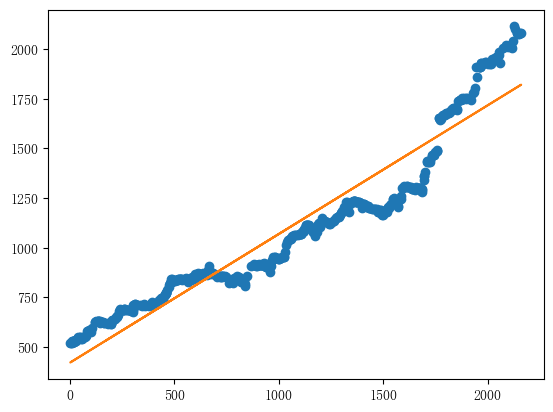

In [19]:
import matplotlib.pyplot as plt
plt.plot(X_test, Y_test, 'o')
plt.plot(X_test, Y_pred, '-')
plt.show()

In [20]:
from sklearn.metrics import r2_score

r2_score(Y_test, Y_pred)

0.9084780190688772

In [21]:
m = regressor.coef_[0]
b = regressor.intercept_
print("y = {}x + {}".format(m, b))

y = [0.64794207]x + [421.54114095]
